In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'E:\\chest_xray\\train\\'
valid_path = 'E:\\chest_xray\\test\\'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob('E:\\chest_xray\\train\\*')

In [6]:
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('E:\\chest_xray\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('E:\\chest_xray\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
163/163 [==============================] - 1504s 9s/step - loss: 0.7508 - accuracy: 0.7855 - val_loss: 0.3806 - val_accuracy: 0.8462
Epoch 2/5
163/163 [==============================] - 1519s 9s/step - loss: 0.3852 - accuracy: 0.8453 - val_loss: 0.3322 - val_accuracy: 0.8622
Epoch 3/5
163/163 [==============================] - 1496s 9s/step - loss: 0.2706 - accuracy: 0.8880 - val_loss: 0.3185 - val_accuracy: 0.8670
Epoch 4/5
163/163 [==============================] - 1518s 9s/step - loss: 0.3044 - accuracy: 0.8788 - val_loss: 0.4384 - val_accuracy: 0.8205
Epoch 5/5
163/163 [==============================] - 1511s 9s/step - loss: 0.3262 - accuracy: 0.8773 - val_loss: 0.4390 - val_accuracy: 0.8333


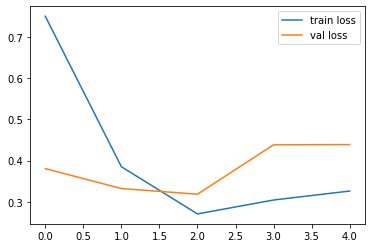

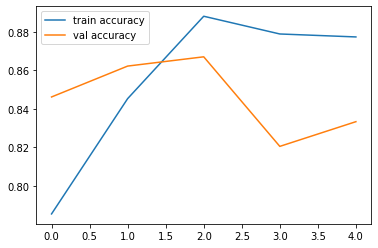

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [15]:
import tensorflow as tf

from keras.models import load_model

model.save('E:\\chest_xray\\val\\model_resnet50.h5')